*Project Name *- Eda On AirBnB

**Project Summary**

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide. For hosts, it's a way to earn money while protecting their property from potential damage. However, for guests, it's a risky venture that they should avoid.

For this project we are analyzing Airbnb’s New York City(NYC) data of 2019. NYC is not only the most famous city in the world but also top global destination for visitors drawn to its museums, entertainment, restaurants and commerce. According to the Office of New York State Comptroller, NYC hosted 66.6 million visitors in 2019.

Data analysis on thousands of listings provided through Airbnb is a crucial factor for the company. Our main objective is to find out the key metrics that influence the listing of properties on the platform. For this, we will explore and visualize the dataset from Airbnb in NYC using basic exploratory data analysis (EDA) techniques. We have found out the distribution of every Airbnb listing based on their location, including their price range, room type, listing name, and other related factors. We have analyzed this dataset from different angles and have come up with interesting insights. This can help in making strategic data-driven decisions by the marketing team, finance team and technical team of Airbnb.

**Github_Link**

https://github.com/rahul99554/EDA-on-Airbnb.git

Problem Statement

What is the average preferred price by customers according to the location?

Number of active hosts per location (Where most of the hosts focused to own property?)

Where the customer pays the highest and lowest rent according to location?

Most popular/demanded host of Airbnb in New York

Find the total count of each room type

Room types and their relation with availability in different neighbourhood groups

Which are the top 25 most used words in listing names?

Find top 10 hosts with most listings

Find the top three hosts based on their turnover

Find total no. of nights spend per location

Total no. of nights spends per room types

Top 10 highest listing neighborhood

**Objective**


Data Analysis and Visualization: Using plots to find relations between the features

What is the average preferred price by customers according to the location?

Number of active hosts per location (Where most of the hosts focused to own property?)

Where the customer pays the highest and lowest rent according to location?

Most popular/demanded host of Airbnb in New York

Find the total count of each room type

Room types and their relation with availability in different neighbourhood groups

Which are the top 25 most used words in listing names?

Find top 10 hosts with most listings

Find the top three hosts based on their turnover

Find total no. of nights spend per location

Total no. of nights spends per room types

Top 10 highest listing neighborhood

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# loading the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/almabetter data/Airbnb NYC 2019.csv')

In [5]:
#data first view
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
# information about dataset
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#shape of data
airbnb_df.shape

(48895, 16)

Cleaning the data



In [8]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
# Drop null observations
airbnb_non_null_df = airbnb_df.dropna()

In [11]:

airbnb_non_null_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

**Finding Total count of each room types**

In [12]:

# Finding unique values from column 'room_type'
airbnb_room_type = airbnb_df.room_type.unique()

In [13]:
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [14]:
# Which is the most listed room type?
airbnb_roomtype_frequency = dict(airbnb_df.room_type.value_counts())

In [15]:

airbnb_roomtype_frequency

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

Text(0.5, 1.0, 'Count of Listed Rooms')

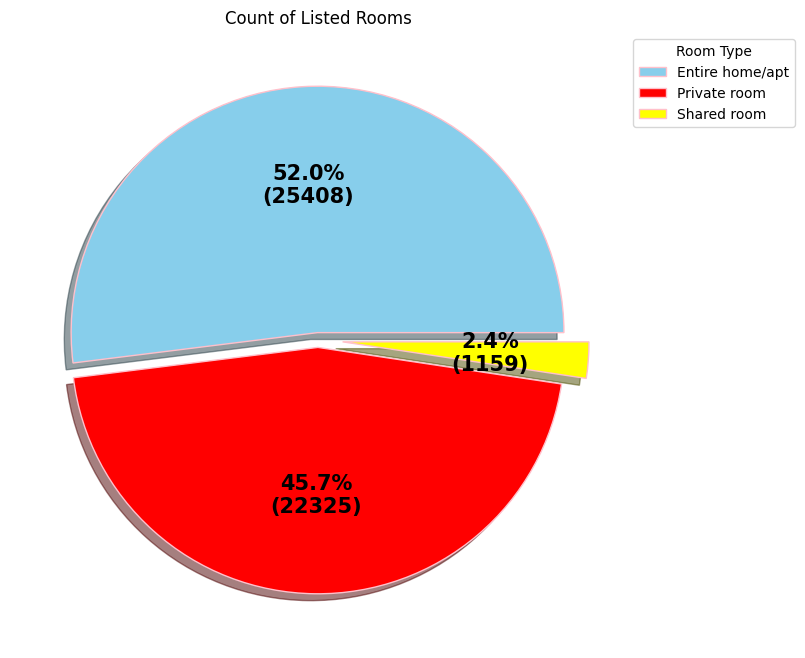

In [16]:

# Creating Dataset

room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())

# Creating color parameters

colors = ( "skyblue", "red", "yellow",)

# Creating explode data

explode = (0.03, 0.03, 0.1)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating Pie Chart

# Creating plot
fig, airbnb_pie_chart = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 15, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")

Visualizing all listing’s room type proportions from each neighbourhood group using Plotly API library for graph visualization

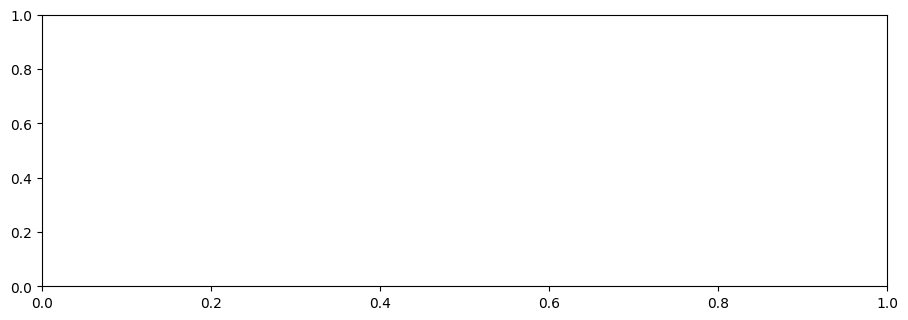

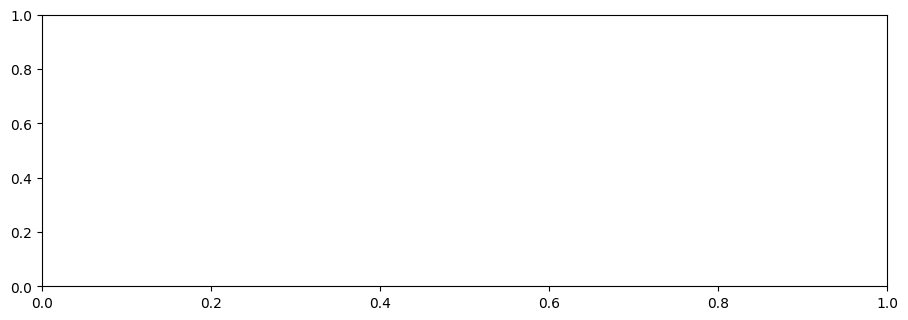

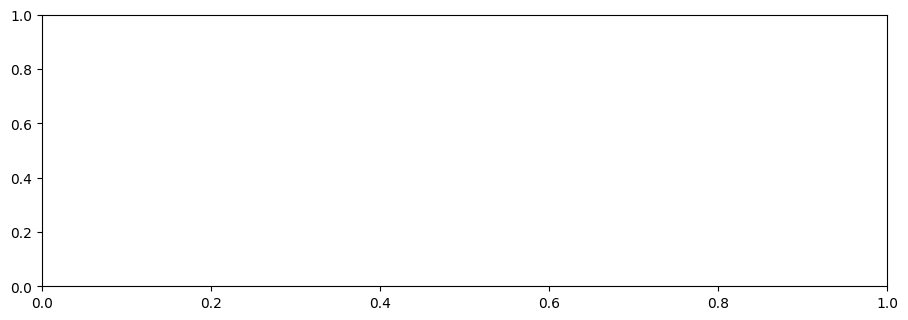

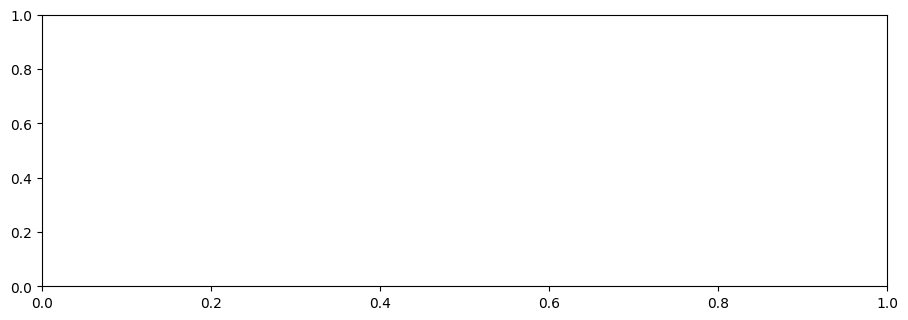

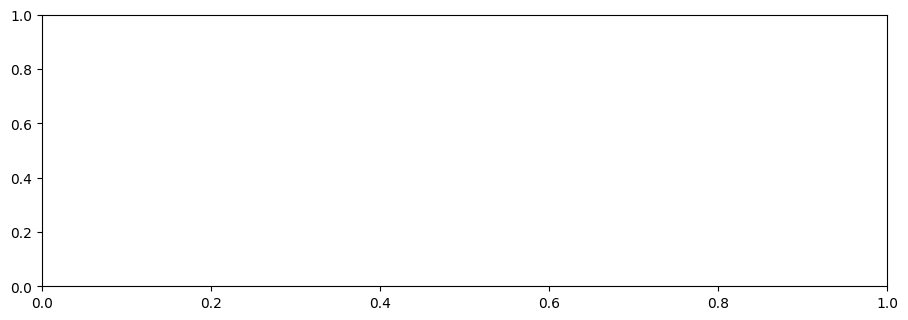

In [17]:
import plotly.offline as pyo
import plotly.graph_objs as go

#Setting up the color pallete
color_dict = {'Private room': '#cc5a49', 'Entire home/apt' : '#4586ac', 'Shared room' : '#C0C0C0'}

#Grouping the room type using 'neighbourhood_group' as an index
airbnb_types=airbnb_df.groupby(['neighbourhood_group', 'room_type']).size()

#Creating function to plot room type proportion on all region area
for region in airbnb_df.neighbourhood_group.unique():

    plt.figure(figsize=(24,12))

    airbnb_reg=airbnb_types[region]
    labels = airbnb_reg.index
    sizes = airbnb_reg.values


    plot_num = 321
    plt.subplot(plot_num)
    reg_ch = go.Figure(data = [go.Pie(labels = labels, values = sizes, hole = 0.6)])
    reg_ch.update_traces(title = region, textfont_size=15, titlefont_size=25)
    reg_ch.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.10,
    ))
    reg_ch.show()

Finding Relation between neighbourhood group and availability of rooms

<ipython-input-18-070fd7214460>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-18-070fd7214460>:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

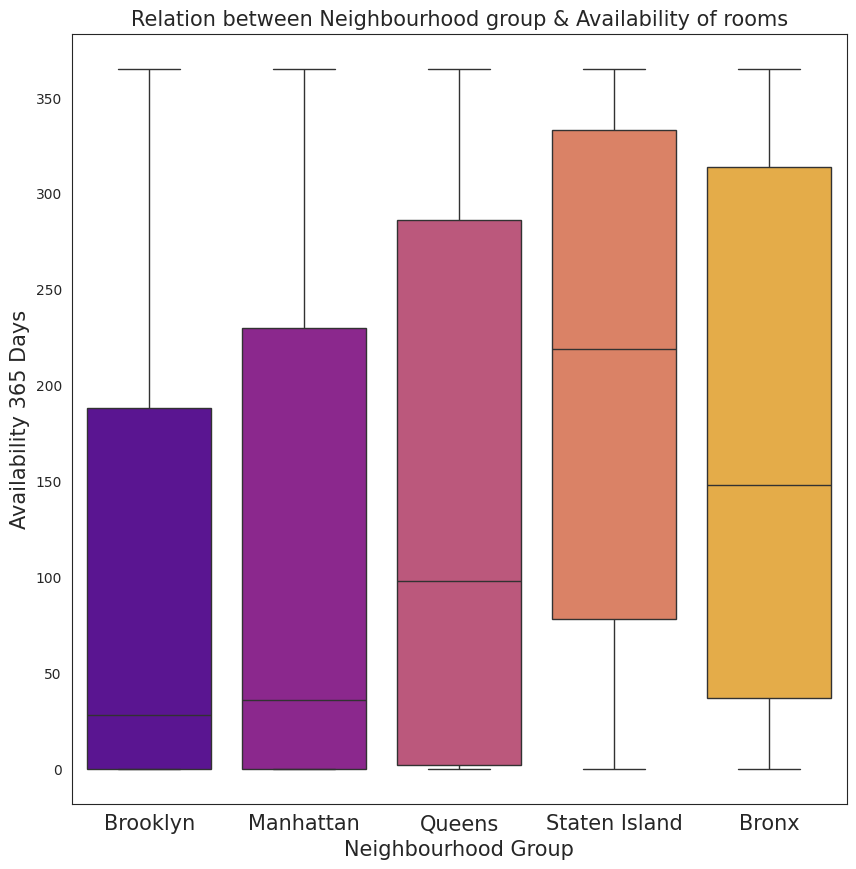

In [18]:
plt.figure(figsize=(10,10))
sns.set_style('white')

ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

In [19]:
#  Finding Top 25 most used words from listing names
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [20]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]


[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [21]:

# Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25

[('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293),
 ('village', 2055),
 ('heart', 2044),
 ('large', 1882),
 ('loft', 1822)]

In [22]:
#converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,room,9389
1,bedroom,7231
2,private,6985
3,apartment,6113
4,cozy,4634
5,studio,3772
6,brooklyn,3629
7,apt,3571
8,spacious,3387
9,1,3357


Visualizing the findings

<ipython-input-23-ac49697cf094>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, 'room'),
 Text(1, 0, 'bedroom'),
 Text(2, 0, 'private'),
 Text(3, 0, 'apartment'),
 Text(4, 0, 'cozy'),
 Text(5, 0, 'studio'),
 Text(6, 0, 'brooklyn'),
 Text(7, 0, 'apt'),
 Text(8, 0, 'spacious'),
 Text(9, 0, '1'),
 Text(10, 0, 'with'),
 Text(11, 0, '2'),
 Text(12, 0, 'east'),
 Text(13, 0, 'and'),
 Text(14, 0, 'manhattan'),
 Text(15, 0, '&'),
 Text(16, 0, 'park'),
 Text(17, 0, 'sunny'),
 Text(18, 0, 'beautiful'),
 Text(19, 0, 'near'),
 Text(20, 0, 'williamsburg'),
 Text(21, 0, 'village'),
 Text(22, 0, 'heart'),
 Text(23, 0, 'large'),
 Text(24, 0, 'loft')]

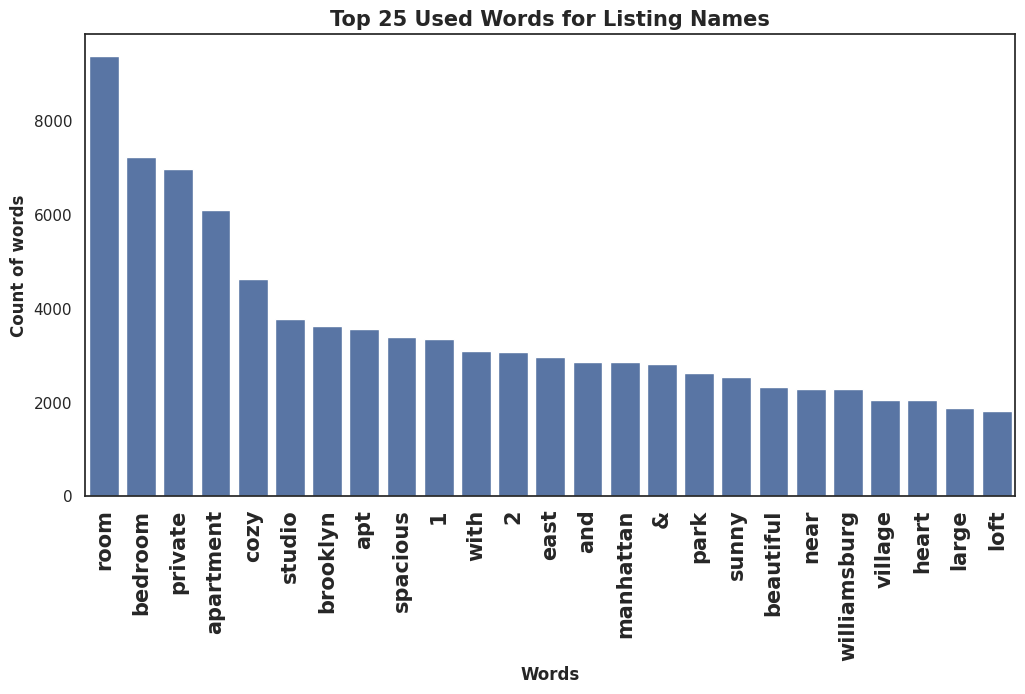

In [23]:
#Setting the figure size
sns.set(rc={'figure.figsize':(12,6)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
count_viz = sns.barplot(x='Words',y='Counts', data = word_count_df)

# Naming the Chart
count_viz.set_title('Top 25 Used Words for Listing Names', weight = 'bold').set_fontsize('15')


# Naming X & Y axis
count_viz.set_ylabel('Count of words', weight = 'bold')
count_viz.set_xlabel('Words', weight = 'bold')

#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 90, weight = 'bold', size = '15')

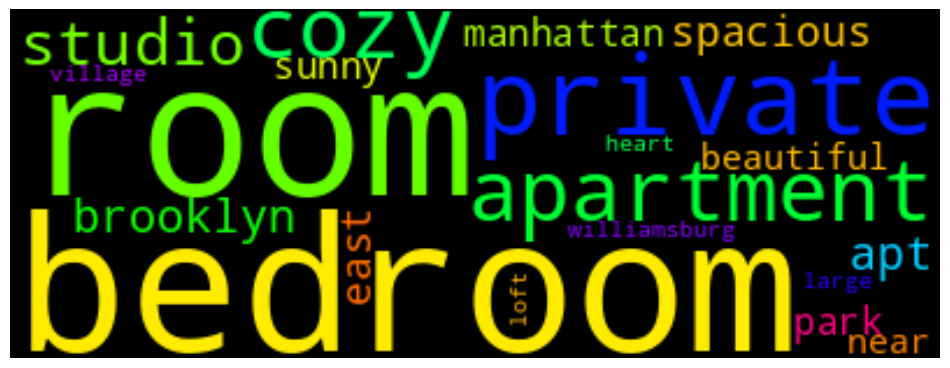

In [24]:
#Importing WordCloud library
from wordcloud import WordCloud, ImageColorGenerator
text = ' '.join(str(n) for n in word_count_df.Words)

#Generating wordcloud image
wordcloud = WordCloud(max_font_size=80, colormap='hsv', width=400, height=150).generate(text)
plt.figure(figsize=(12,8))

#Displaying the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Finding Top 10 Listing Counts

In [25]:
#Creating DataFrame
count_host_id = list(airbnb_df['host_id'].value_counts())
host_id = list(airbnb_df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


<ipython-input-26-88f152c44b91>:22: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '2787'),
 Text(1, 0, '2845'),
 Text(2, 0, '4632'),
 Text(3, 0, '4869'),
 Text(4, 0, '7192'),
 Text(5, 0, '7322'),
 Text(6, 0, '7356'),
 Text(7, 0, '8967'),
 Text(8, 0, '7490'),
 Text(9, 0, '7549')]

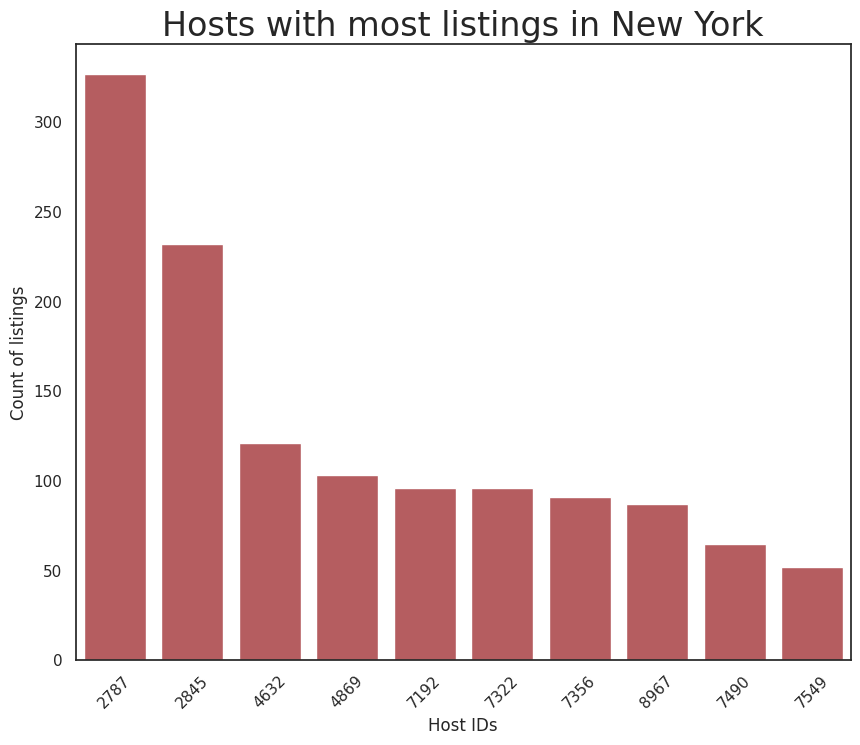

In [26]:
#Setting the figure size
sns.set(rc={'figure.figsize':(10,8)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Id', y= 'Counts', color='r', data=top_host_id,
                      order=top_host_id.sort_values('Counts',ascending = False).Host_Id)

#Setting font size for title
sns.set(font_scale = 2)

# Naming the Chart
viz_bar.set_title('Hosts with most listings in New York')

# Naming X & Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')

#Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)

In [27]:
# What is the average preferred price by customers according to the location?
#Average_price of property according to the location
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [28]:

#Unstack the group by information for plot the graph
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

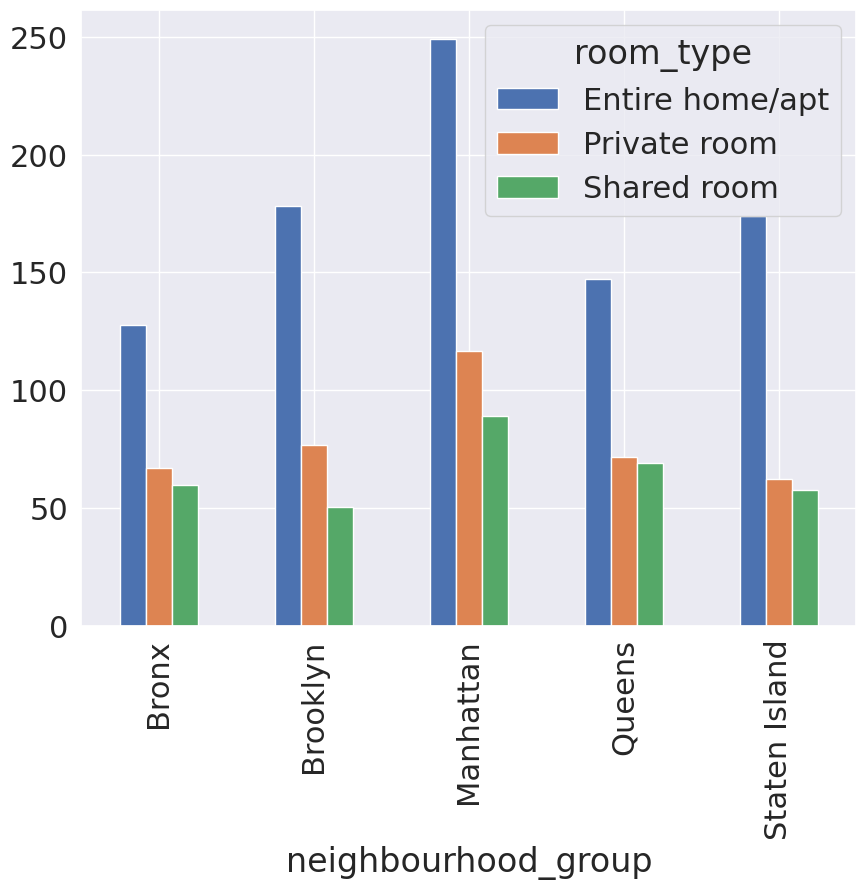

In [29]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

In [30]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


In [31]:

#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location


neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

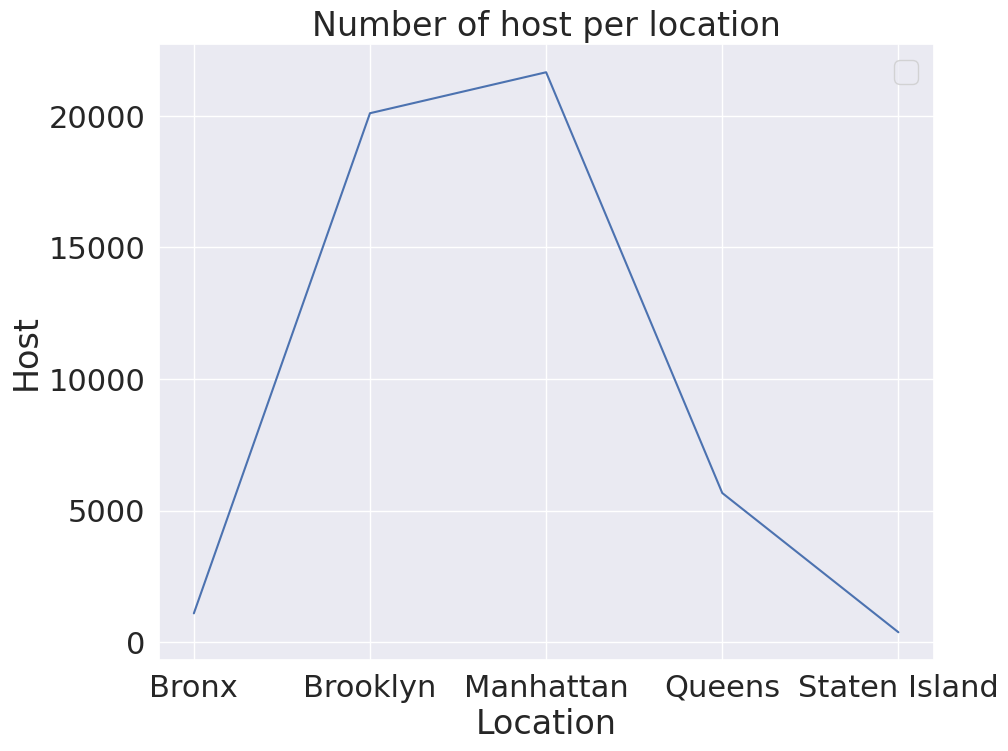

In [32]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

In [33]:

airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Points to be noted:

 @ Here we can see that there is minimum price 0$.We have to fix it anyway because Airbnb is not provide free stay in any hotel.

Solution: For that we check where the price is 0. We create one funtion in which as per minimum nights the price will be set as per formula [Refer below cells for more detail]

@  here are some entries in dataset in which minimum nights = 1 but it's respective price is 0

Solution: We replace the price value with the mean value of price which amount is less than 100$. [Refer below cells for more detail]

In [34]:
# identify the observations where minimum nights is 1 and price is minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,NaN,NaN,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,2019-06-12,1.68,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,NaN,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146


In [35]:
#Get the number of values which price is less than 100$
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count()

21877

In [36]:

#Make a copy of original dataframe to perform additional operation for get the desire result
airbnb_price_df = airbnb_df.copy()

In [37]:
#Find the mean value of price which value is less than 100$
round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())

65

In [38]:
#Change the value of price where minimum night = 1 and price of their property is less than 50$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] <= 50) & (airbnb_price_df['minimum_nights'] == 1) ,round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()) , airbnb_price_df['price']
   )

In [39]:
#still 8 rows have amount = 0$
airbnb_price_df[airbnb_price_df['price']==0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
latitude                          8
longitude                         8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
last_review                       7
reviews_per_month                 7
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [40]:
#Find the observations where price is 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [41]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

In [42]:
#Replace the value of price according to minimum night where price = 0$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] == 0) ,price_calculator(airbnb_price_df['minimum_nights']) , airbnb_price_df['price'])

In [43]:

#Our new description of dataset
airbnb_price_df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,153.829614,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,239.999410,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


.Where the customer pays the highest and lowest rent according to location

In [44]:
#Get the highest rent according to location
max_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [45]:

#Get the lowest rent according to location
min_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [46]:

#Get the combine dataframe of minimum and maximum price according to location
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,20
4,Bronx,2500,20


In [47]:
#Create a copy of merge price dataframe
merge_price_df_copy = merge_price_df.copy()

In [48]:

#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price

In [49]:
#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)


In [50]:

#Output of maximum price and minimum price after log transformation
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Brooklyn,13.287712,3.321928
1,Manhattan,13.287712,3.321928
2,Queens,13.287712,3.321928
3,Staten Island,12.287712,4.321928
4,Bronx,11.287712,4.321928


Text(0.5, 1.0, 'Maximum and minimum price according to location')

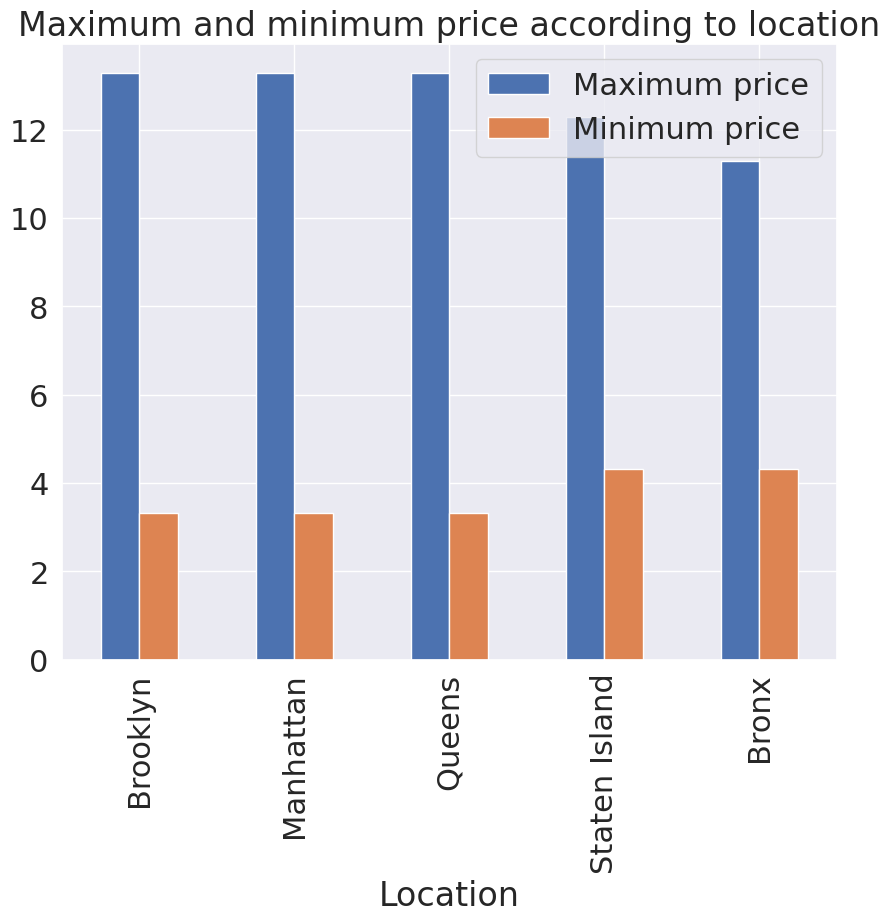

In [51]:
#Bar graph for display maximum price and minimum price according to location
merge_price_df_copy.plot(x="Location", y=['Maximum price','Minimum price'], kind="bar")
plt.legend(labels = ['Maximum price','Minimum price'])
plt.title('Maximum and minimum price according to location')

Most Popular/demanded host of Airbnb in New york

In [52]:
#Get the host based on number of reviews
host_based_on_review_df = airbnb_price_df.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_based_on_review_df

,host_id,host_name,number_of_reviews
21304,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18626,26432133,Danielle,2017
20872,35524316,Yasu & Akiko,1971
21921,40176101,Brady,1818
...,...,...,...
21806,39695769,Avra,0
21809,39706334,Erin,0
21812,39724060,Jaime,0
21816,39731713,Polina,0


In [53]:

#Get the host based on availability in a year
host_based_on_availability_df = airbnb_price_df.groupby(['host_id','host_name'],as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = True)
host_based_on_availability_df


,host_id,host_name,availability_365
0,2438,Tasos,0.0
11587,10263977,A,0.0
11588,10264372,Tyrell,0.0
11589,10264377,Anthony,0.0
22251,41757762,Sara,0.0
...,...,...,...
22355,42237225,Orlando,365.0
36648,262287464,Daniel,365.0
32610,165448425,Shana,365.0
21179,36881439,Etkin,365.0


In [54]:
#Merge two dataframe based on number of reviews and availability in a year
popular_host_df = pd.merge(host_based_on_review_df,host_based_on_availability_df,on = ['host_id','host_name']).sort_values(['availability_365','number_of_reviews'],ascending = [True,False]).rename(columns = {'number_of_reviews':'Number of reviews','availability_365':'Availability in a year'})

popular_host_df

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0
...,...,...,...,...
37151,37424221,Trevor,0,365.0
37239,35741633,Chen,0,365.0
37255,38363932,Marie,0,365.0
37257,40733012,Victor,0,365.0


In [55]:

#Most popular top 5 host in new york
popular_host_df.head(5)

,host_id,host_name,Number of reviews,Availability in a year
12,22959695,Gurpreet Singh,1157,0.0
41,99392252,Michael,732,0.0
47,121391142,Deloris,693,0.0
122,792159,Wanda,480,0.0
125,37818581,Sofia,479,0.0


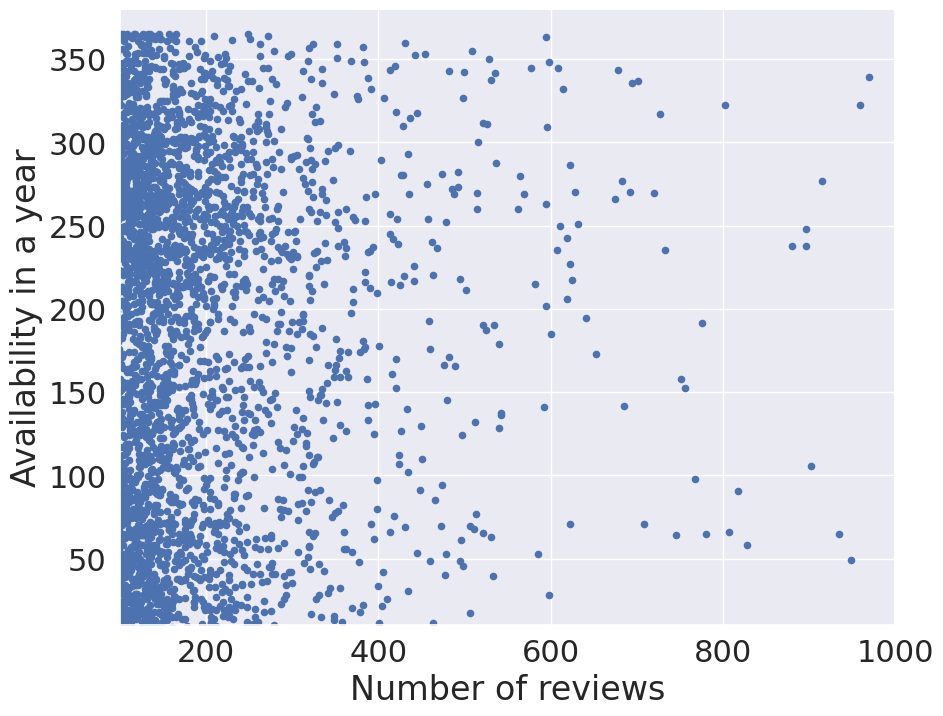

In [56]:
#Create scatter plot based on number of reviews and availability in a year
popular_host_df.plot.scatter(x='Number of reviews', y='Availability in a year', xlim=(100,1000),ylim=(10,380));

Find the top three hosts based on their turnover.

In [59]:
# drop null value from the dataset
non_null_file = airbnb_df.dropna()
non_null_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [60]:

# copy of the non_null_file
new=non_null_file.copy()
new.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [61]:
# replace whose price less than 50
new.loc[new['price']<50,'price'] = new.loc[(new['price']>50) & (new['price']<80),'price'].median()
new['price'].describe()

count    38821.000000
mean       144.934262
std        195.771964
min         50.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [62]:
# after removing price less than 100
new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [63]:

#  find the maximum price across different host name
top_host=new.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
top_host.head()
#top_host.info()

,host_name,host_id,total_price
0,'Cil,45354224,120
1,(Ari) HENRY LEE,40605120,140
2,(Email hidden by Airbnb),5610823,261
3,(Email hidden by Airbnb),7580102,389
4,(Email hidden by Airbnb),11495251,200


In [64]:

# find top three host best on their turnover
top_3=top_host.sort_values('total_price',ascending=False).iloc[:3,:3]
top_3

,host_name,host_id,total_price
26844,Sonder (NYC),219517861,55920
24115,Red Awning,205031545,24194
11329,Henry,836168,19500


AttributeError: Text.set() got an unexpected keyword argument 'Weight'

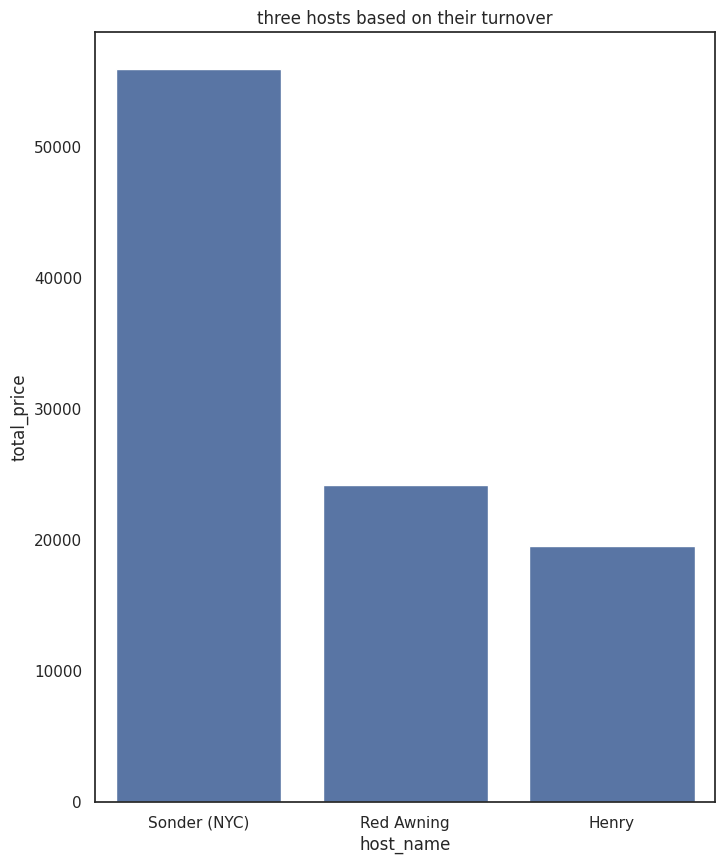

In [65]:

sns.set(rc={'figure.figsize':(8,10)})
sns.set_style('white')
abc= sns.barplot(x='host_name',y='total_price',data = top_3)
abc.set_title('three hosts based on their turnover', Weight='bold')
abc.set_ylabel('host name', Weight='bold')
abc.set_xlabel('total price', Weight='bold')

abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='15')

Find total no. nights spend per location

In [66]:

#  find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=new.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_nights=total_nights.sort_values('minimum_nights',ascending=True)
final_nights.head()

,neighbourhood_group,minimum_nights
4,Staten Island,1074
0,Bronx,3441
3,Queens,19305
1,Brooklyn,87458
2,Manhattan,116571


AttributeError: Text.set() got an unexpected keyword argument 'Weight'

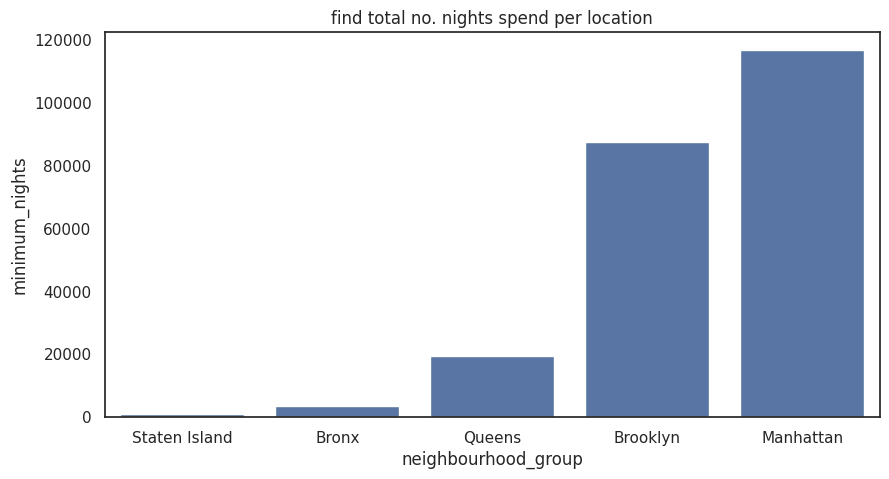

In [68]:
# visualization of total no. nights spend per location using seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
abc= sns.barplot(x='neighbourhood_group',y='minimum_nights',data = final_nights)
abc.set_title('find total no. nights spend per location', Weight='bold')
abc.set_ylabel('minimum night', Weight='bold')
abc.set_xlabel('neighbourhood group', Weight='bold')

abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='15')

Total no. of nights spend per room types

In [69]:
# find unique value of room types
list(new['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [70]:

#  find the maximum(minimum nights) spending by customer across different room type
total_room=new.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()


,room_type,minimum_nights
2,Shared room,3721
1,Private room,80160
0,Entire home/apt,143968


In [71]:
# create dataset
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['green','pink','yellow']
# create explode
explode = (0.07, 0.07, 0.07)

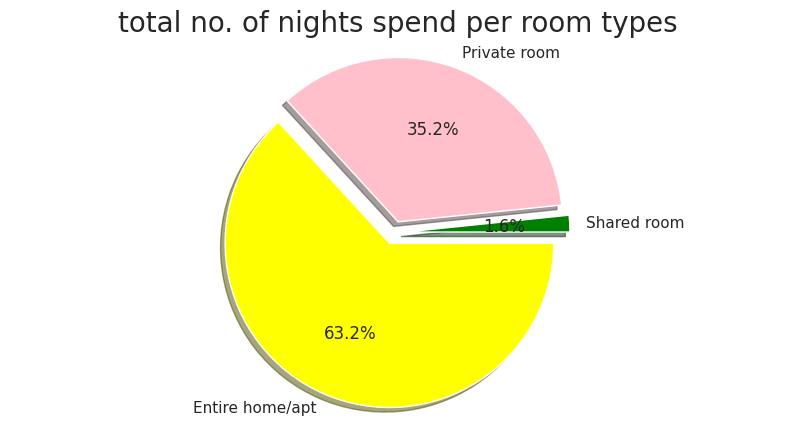

In [72]:

#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")
plt.show()

Top ten Highest listing neighourhood

In [73]:
# find listing value of all neighourhood in dataset
neighour=new['neighbourhood'].value_counts().sort_values(ascending=False).reset_index()
#top ten neighourhood with listing value
top_10=neighour[:10]
top_10

#m.rename(columns={'index': 'newName1', 'neighourhood': 'newName2'}, inplace=True)

,neighbourhood,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


In [74]:

#make copy of top_10
final_10=top_10.copy()
#rename that dataframe
final_10.rename(columns={'index':'neighourhood','neighbourhood':'listing_value' },inplace=True)

final_10

,listing_value,count
0,Williamsburg,3163
1,Bedford-Stuyvesant,3141
2,Harlem,2204
3,Bushwick,1942
4,Hell's Kitchen,1528
5,East Village,1489
6,Upper West Side,1482
7,Upper East Side,1405
8,Crown Heights,1265
9,Midtown,986


In [80]:
# data visualizing with barplot
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('white')
#Plotting the Chart
abc= sns.barplot(x='neighourhood', y='listing_value',data = final_10)
abc.set_title('find total no. nights spend per location', Weight='bold')
# Naming X & Y axis
abc.set_ylabel('listing value', Weight='bold')
abc.set_xlabel('neighourhood', Weight='bold')
#Adjusting Bar labels

abc.set_xticklabels(abc.get_xticklabels(),Weight='bold',rotation = 45,size='15')

ValueError: Could not interpret value `neighbourhood` for `x`. An entry with this name does not appear in `data`.

# **Conclusion**

Manhattan is the most focused place in New York for hosts to do their business.

Customers pay highest amount in Brooklyn,Queens and Manhattan that is 10,000 and lowest amount is 10$.

For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $157, for shared room is around 60, and for private room is around 75.

'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ is the least listed room type at only 2.4% in total.

People stay for longer duration of time in Private rooms in Brooklyn and Manhattan. *Words such as ‘bedroom’, ‘cozy’, ‘private’, ‘apartment’ and ‘spacious’ are used more frequently than words such as ‘park’, ‘near’, ‘village’ and ‘heart’. *Count of listing by top 10 hosts is almost 2.5%(1270 listings) of the whole dataset. *Top three host base on their turnover are Sonder(nyc),Red awning, Henry and best host is Sonder(nyc) *More customer preferred Manhattan location for night stay then Brooklyn *63.2% customer spend night in Entire home and 1.6% spend night in Shared room